In [19]:
import numpy as np
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=np.inf)
#Step 1: Load the training data
data = np.load('mnist.npz')
x_train = data['x_train']/255
y_train = data['y_train']
x_test = data['x_test']/255
y_test = data['y_test']

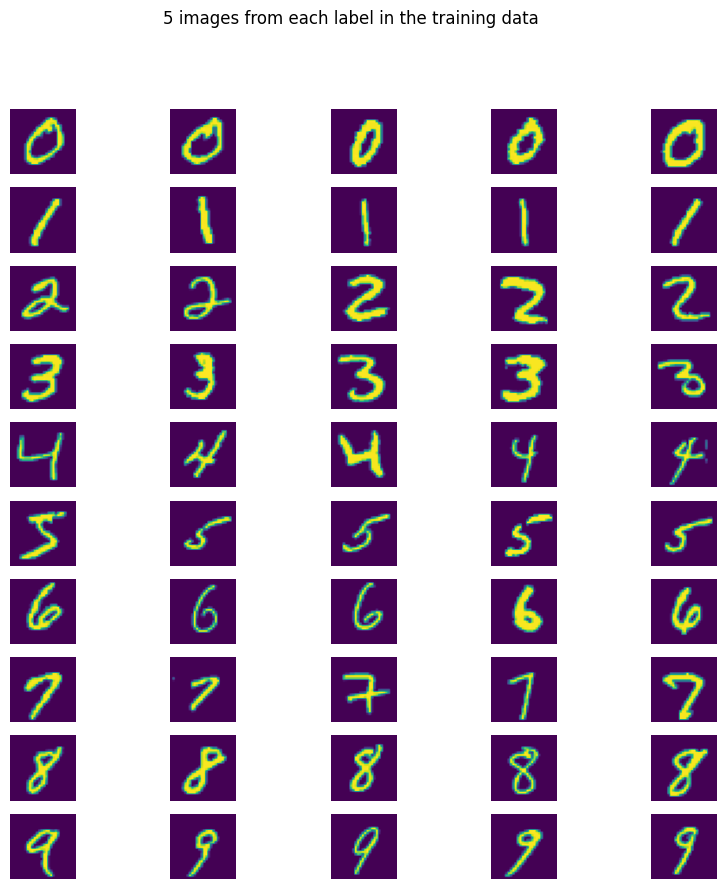

In [20]:
#plot 5 image from each label in the training data
fig, ax = plt.subplots(10,5,figsize=(10,10))
fig.suptitle('5 images from each label in the training data')
for i in range(10):
    for j in range(5):
        ax[i,j].imshow(x_train[y_train == i][j])
        ax[i,j].axis('off')
plt.show()


In [10]:
priors = {}
for i in range(10):
    #calculate number of samples in each class
    num_samples = len(x_train[y_train == i])
    #calculate the prior probability of each class
    priors[i] = num_samples / len(y_train)
print(priors)

{0: 0.09871666666666666, 1: 0.11236666666666667, 2: 0.0993, 3: 0.10218333333333333, 4: 0.09736666666666667, 5: 0.09035, 6: 0.09863333333333334, 7: 0.10441666666666667, 8: 0.09751666666666667, 9: 0.09915}


This code block is one variation of the qda function where we do include the determinant of the covariance matrices.

In [11]:
x_train = x_train.reshape(60000, 28*28)
means = np.array([np.mean(x_train[y_train == i], axis=0) for i in range(10)])
covs = np.array([np.cov(x_train[y_train == i], rowvar=False) + (np.identity(784) * (10**-5))  for i in range(10)])
inv_covs = np.array([np.linalg.inv(covs[i]) for i in range(10)])
logdets = np.array([np.linalg.slogdet(covs[i])[1] for i in range(10)])
constants = [-0.5*(np.dot(means[i].T,np.dot(inv_covs[i],means[i])))-0.5*logdets[i] + np.log(priors[i]) for i in range(10)]
invsdotmeans = np.array([np.dot(inv_covs[i],means[i]) for i in range(10)])

Interestingly, if we notice, the the determinant of the covariance matrix is the same for all classes in this training dataset and due to the nature of discriminant functions, we can remove any terms related to the determinant of the covariance matrix for each class and still have a valid discriminant function.


In [4]:
x_train = x_train.reshape(60000, 28*28)
means = np.array([np.mean(x_train[y_train == i], axis=0) for i in range(10)])
covs = np.array([np.cov(x_train[y_train == i], rowvar=False) + (np.identity(784) * (10**-5))  for i in range(10)])
inv_covs = np.array([np.linalg.inv(covs[i]) for i in range(10)])
logdets = np.array([np.linalg.slogdet(covs[i])[1] for i in range(10)])
constants = [-0.5*(np.dot(means[i].T,np.dot(inv_covs[i],means[i]))) + np.log(priors[i]) for i in range(10)]
invsdotmeans = np.array([np.dot(inv_covs[i],means[i]) for i in range(10)])

In [12]:
def qda(x, invcovs,constants, i,invsdotmeans):#returns the score based on the QDA model
    xtranspose = x.T
    xTWix = -0.5*np.dot(np.dot(xtranspose,invcovs[i]),x)
    witx = np.dot(invsdotmeans[i].T,x)
    return xTWix + witx + constants[i]

In [13]:
#testing the QDA model
x_test = x_test.reshape(10000, 28*28)
y_pred = []
for i in range(len(x_test)):
    scores = [qda(x_test[i], inv_covs,constants, j,invsdotmeans) for j in range(10)]
    y_pred.append(scores.index(max(scores)))
print(y_pred)

[7, 2, 1, 0, 4, 1, 8, 9, 5, 9, 0, 6, 9, 0, 1, 3, 9, 7, 2, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 0, 1, 1, 7, 9, 2, 3, 8, 8, 2, 9, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 8, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 8, 2, 9, 7, 9, 6, 2, 9, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 2, 6, 9, 6, 0, 8, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 8, 4, 4, 9, 8, 3, 8, 7, 6, 7, 9, 0, 8, 8, 8, 6, 6, 3, 3, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 8, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 8, 2, 3, 8, 9, 1, 8, 1, 8, 1, 8, 8, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 4, 1, 6, 9, 8, 3, 6, 1, 1, 1, 3, 9, 3, 2, 9, 4, 8, 9, 3, 9, 0, 3, 5, 8, 5, 9, 3, 2, 7, 1, 2, 8, 4, 1, 9, 3, 8, 8, 9, 7, 9, 2, 2, 4, 1, 8, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 9, 2, 8, 2, 0, 8, 8, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 9, 1, 8, 2, 1, 2, 9, 9, 5, 9, 2, 6, 4, 1, 8, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 8, 3, 3, 0, 0, 3, 1, 9, 6, 5, 3, 5, 9, 9, 9, 3, 0, 8, 2, 0, 7, 1, 1, 2, 1, 

In [14]:
#calculate the accuracy
y_pred = np.array(y_pred)
print('Accuracy:', np.mean(y_pred == y_test))

Accuracy: 0.8344


In [15]:
#calculate classwise accuracy
classwise_accuracy = {}
for i in range(10):
    classwise_accuracy[i] = np.mean(y_pred[y_test == i] == i)
print('Classwise accuracy:', classwise_accuracy)

Classwise accuracy: {0: 0.95, 1: 0.9383259911894273, 2: 0.812984496124031, 3: 0.8118811881188119, 4: 0.7688391038696538, 5: 0.6199551569506726, 6: 0.9311064718162839, 7: 0.6906614785992218, 8: 0.8880903490759754, 9: 0.9058473736372646}
